In [ ]:
import librosa
import soundfile as sf
import numpy as np
import os
import matplotlib.pyplot as plt

def extract_mfcc(file_path, n_mfcc=13, hop_length=512, n_fft=2048):
    # Load audio file using soundfile
    audio, sr = sf.read(file_path)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)

    return mfccs

def process_timit_data(data_path, output_path):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Process each TIMIT file
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".WAV"):
                file_path = os.path.join(root, file)

                # Extract subfolder name from the TIMIT path
                subfolder_name = os.path.relpath(root, data_path)

                # Create subfolder in the output directory
                output_subfolder = os.path.join(output_path, subfolder_name)
                if not os.path.exists(output_subfolder):
                    os.makedirs(output_subfolder)

                # Extract MFCC features
                mfccs = extract_mfcc(file_path)

                # Save MFCC matrix in the subfolder
                output_file = os.path.join(output_subfolder, os.path.splitext(file)[0] + "_mfcc.npy")
                np.save(output_file, mfccs.T)

                print(f"Processed {file} and saved MFCC matrix to {output_file}")

if __name__ == "__main__":
    # Set the path to the TIMIT dataset and output directory
    timit_data_path = "/content/Data"
    output_directory = "/content/Output"

    process_timit_data(timit_data_path, output_directory)

Processed SX440.WAV and saved MFCC matrix to /content/Output/MTJG0/SX440_mfcc.npy
Processed SI2157.WAV and saved MFCC matrix to /content/Output/MTJG0/SI2157_mfcc.npy
Processed SA2.WAV and saved MFCC matrix to /content/Output/MTJG0/SA2_mfcc.npy
Processed SI1520.WAV and saved MFCC matrix to /content/Output/MTJG0/SI1520_mfcc.npy
Processed SX260.WAV and saved MFCC matrix to /content/Output/MTJG0/SX260_mfcc.npy
Processed SI890.WAV and saved MFCC matrix to /content/Output/MTJG0/SI890_mfcc.npy
Processed SX350.WAV and saved MFCC matrix to /content/Output/MTJG0/SX350_mfcc.npy
Processed SX170.WAV and saved MFCC matrix to /content/Output/MTJG0/SX170_mfcc.npy
Processed SA1.WAV and saved MFCC matrix to /content/Output/MTJG0/SA1_mfcc.npy
Processed SX80.WAV and saved MFCC matrix to /content/Output/MTJG0/SX80_mfcc.npy
Processed SI771.WAV and saved MFCC matrix to /content/Output/MTDB0/SI771_mfcc.npy
Processed SX141.WAV and saved MFCC matrix to /content/Output/MTDB0/SX141_mfcc.npy
Processed SA2.WAV and 

MFCC Image Shape: (92, 13)


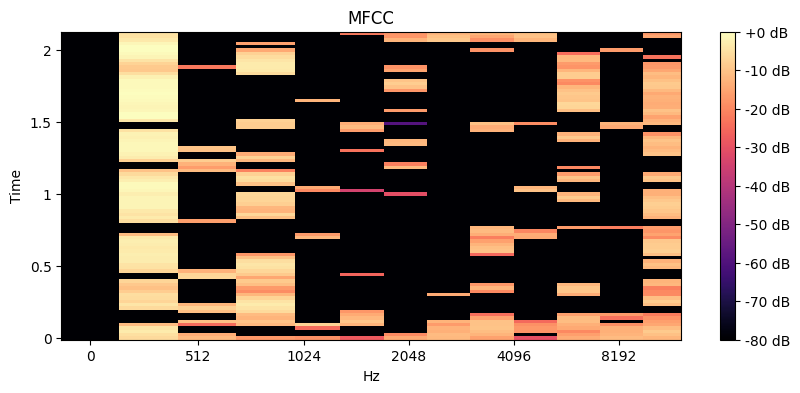

In [ ]:
mfcc_image = np.load('/content/Output/FCJF0/SA1_mfcc.npy')
print("MFCC Image Shape:", mfcc_image.shape)
# Display MFCC as an image
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mfcc_image, ref=np.max), y_axis='time', x_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

In [ ]:
import os
import random
import shutil

# Set the paths for your source and destination directories
source_directory = 'Output'
train_directory = 'train'
test_directory = 'test'

# Set the percentage split for train and test
train_percentage = 80
test_percentage = 20

# Ensure destination directories exist, create them if not
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Iterate through each folder in the source directory
for folder_name in os.listdir(source_directory):
    folder_path = os.path.join(source_directory, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # List all npy files in the folder
        npy_files = [file for file in os.listdir(folder_path) if file.endswith('.npy')]

        # Calculate the number of files for training and testing
        num_files = len(npy_files)
        num_train = int(num_files * (train_percentage / 100))
        num_test = num_files - num_train

        # Randomly shuffle the list of npy files
        random.shuffle(npy_files)

        # Divide files into train and test
        train_files = npy_files[:num_train]
        test_files = npy_files[num_train:]

        # Copy files to train directory
        for file_name in train_files:
            source_file_path = os.path.join(folder_path, file_name)
            dest_file_path = os.path.join(train_directory, folder_name, file_name)
            os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)
            shutil.copy(source_file_path, dest_file_path)

        # Copy files to test directory
        for file_name in test_files:
            source_file_path = os.path.join(folder_path, file_name)
            dest_file_path = os.path.join(test_directory, folder_name, file_name)
            os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)
            shutil.copy(source_file_path, dest_file_path)

print("Dataset split into train and test successfully.")

Dataset split into train and test successfully.


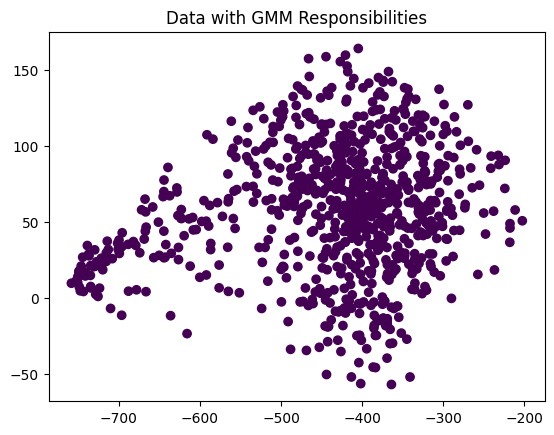

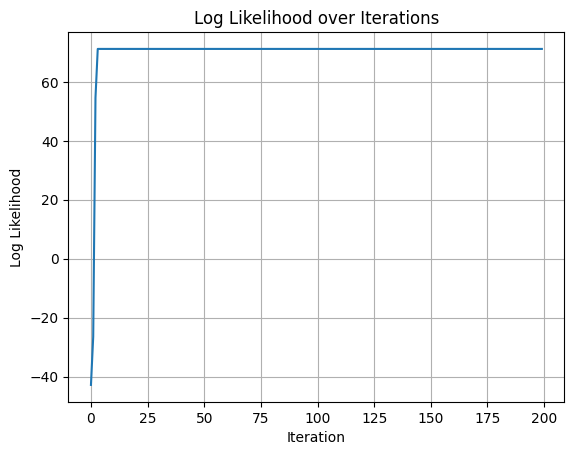

In [ ]:
# Generic GMM Code for Multivariate Data With Any data dimension d and Gaussians K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

data = np.load('/content/concatenated_file4.npy')

def gauss_dist_multivariate(X, mean, cov):
    mvn = multivariate_normal(mean=mean, cov=cov)
    return mvn.pdf(X)

def gmm(X, num_mixtures, max_iter=200):
    num_data, num_features = X.shape

    # Initialize parameters
    np.random.seed(42)
    temp = np.random.permutation(num_data)

    piecap = np.ones((max_iter + 1, num_mixtures)) / num_mixtures
    meucap = np.zeros((max_iter + 1, num_mixtures, num_features))
    sigmacap = np.zeros((max_iter + 1, num_mixtures, num_features, num_features))
    log_likelihood = np.zeros(max_iter + 1)
    responsibilities = np.zeros((max_iter + 1, num_data, num_mixtures))

    for j in range(num_mixtures):
        meucap[0, j, :] = X[temp[j]]
        sigmacap[0, j, :, :] = np.cov(X.T)

    for i in range(max_iter):
        # Expectation Step
        for j in range(num_mixtures):
            responsibilities[i, :, j] = piecap[i, j] * gauss_dist_multivariate(X, meucap[i, j, :], sigmacap[i, j, :, :])

        responsibilities[i, :, :] /= np.sum(responsibilities[i, :, :], axis=0)[np.newaxis, :]


        # Maximization Step
        for j in range(num_mixtures):
            meucap[i + 1, j, :] = np.sum(responsibilities[i, :, j][:, np.newaxis] * X, axis=0) / np.sum(
                responsibilities[i, :, j])
            diag_reg = 1e-6  # small regularization term
            sigmacap[i + 1, j, :, :] = (np.dot((responsibilities[i, :, j][:, np.newaxis] *
                                    (X - meucap[i + 1, j, :])).T,
                                   (X - meucap[i + 1, j, :])) + diag_reg * np.eye(num_features)) / np.sum(responsibilities[i, :, j])

            piecap[i + 1, j] = np.sum(responsibilities[i, :, j]) / num_data

        # Compute log likelihood
        log_likelihood[i] = np.sum(np.log(np.sum(piecap[i + 1, j] * gauss_dist_multivariate(X, meucap[i + 1, j, :],
                                                sigmacap[i + 1, j, :, :]), axis=0)))

    return meucap, sigmacap, piecap, log_likelihood, responsibilities

# Generate synthetic multivariate data. Change for d > 2 as you may.
# np.random.seed(42)
# mean1 = np.array([1, 2])
# cov1 = np.array([[1, 0.5], [0.5, 2]])
# data1 = np.random.multivariate_normal(mean1, cov1, 100)

# mean2 = np.array([6, 8])
# cov2 = np.array([[2, -1], [-1, 1]])
# data2 = np.random.multivariate_normal(mean2, cov2, 100)

# data = np.concatenate((data1, data2), axis=0)

# Apply GMM
num_mixtures = 13
meucap, sigmacap, piecap, log_likelihood, responsibilities = gmm(data, num_mixtures)
data_dict = {
    'meucap': meucap,
    'sigmacap': sigmacap,
    'piecap': piecap,
    'log_likelihood': log_likelihood,
    'responsibilities': responsibilities
}

# Specify the file path for the single .npy file
output_file_path = '/content/train/FECD0/FECD0.npy'

# Save the dictionary to a single .npy file
np.save(output_file_path, data_dict)
# Plot results
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=np.argmax(responsibilities[-1], axis=1), cmap='viridis')
plt.title('Data with GMM Responsibilities')
plt.show()

# Plot log likelihood over iterations
plt.figure()
plt.plot(log_likelihood[:200])
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood over Iterations')
plt.grid()
plt.show()


In [ ]:
import numpy as np

# Specify the file paths for your .npy files
file_paths = [
    '/content/train/FECD0/SA1_mfcc.npy',
    '/content/train/FECD0/SA2_mfcc.npy',
    '/content/train/FECD0/SI1418_mfcc.npy',
    '/content/train/FECD0/SI2048_mfcc.npy',
    '/content/train/FECD0/SX158_mfcc.npy',
    '/content/train/FECD0/SX248_mfcc.npy',
    '/content/train/FECD0/SX428_mfcc.npy',
    '/content/train/FECD0/SX68_mfcc.npy',
    # Add paths for the remaining files
]

# Load each .npy file and concatenate them row-wise
concatenated_data = np.concatenate([np.load(file) for file in file_paths], axis=0)

# Save the concatenated data to a new .npy file
np.save('/content/concatenated_file5.npy', concatenated_data)
concatenated_data.shape


(875, 13)